#Relatorio de Análise VIII
###Identificando e Removendo Outliers

In [42]:
%matplotlib inline
import pandas as pd
import matplotlib as plt
plt.rc('figure', figsize=(16,9))

In [43]:
dados = pd.read_csv('aluguel_residencial.csv', sep=';')

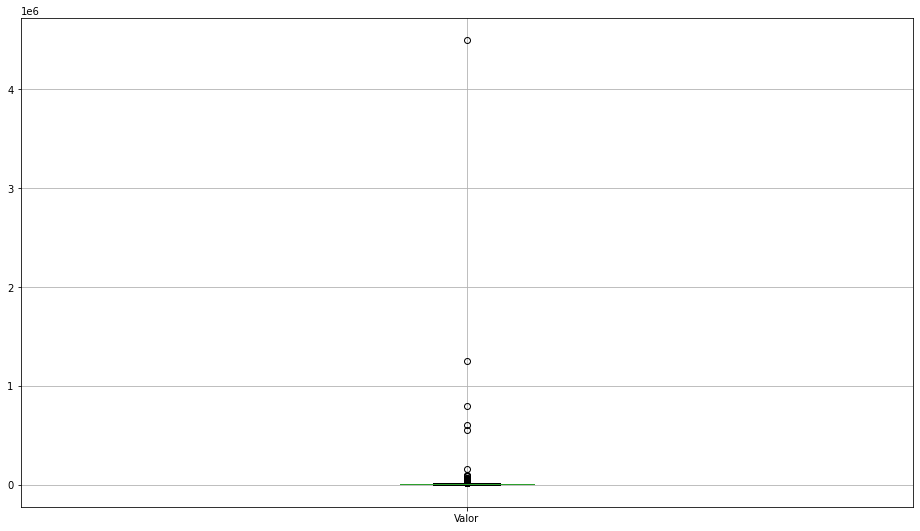

In [44]:
dados.boxplot(['Valor'])

In [45]:
dados[dados.Valor >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Valor bruto m2,Tipo Agregado
7629,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,9247.69,Apartamento
10636,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,4913.50,Casa
12661,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,3673.33,Apartamento
13846,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,7494.05,Apartamento
15520,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,15003.67,Apartamento


In [46]:
valor = dados['Valor']

In [47]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5*IIQ
limite_superior = Q3 + 1.5*IIQ

In [48]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_novos = dados[selecao]

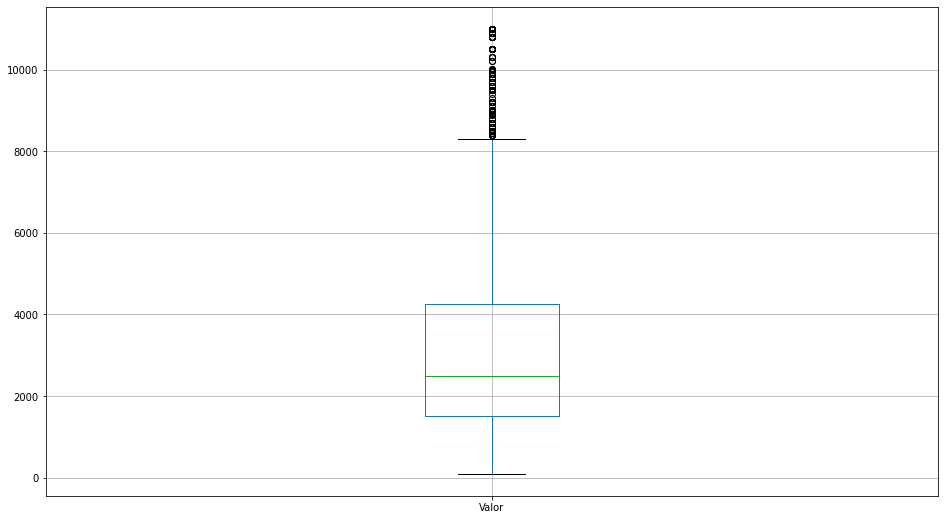

In [49]:
dados_novos.boxplot(['Valor'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f89df9a01d0>]],
      dtype=object)

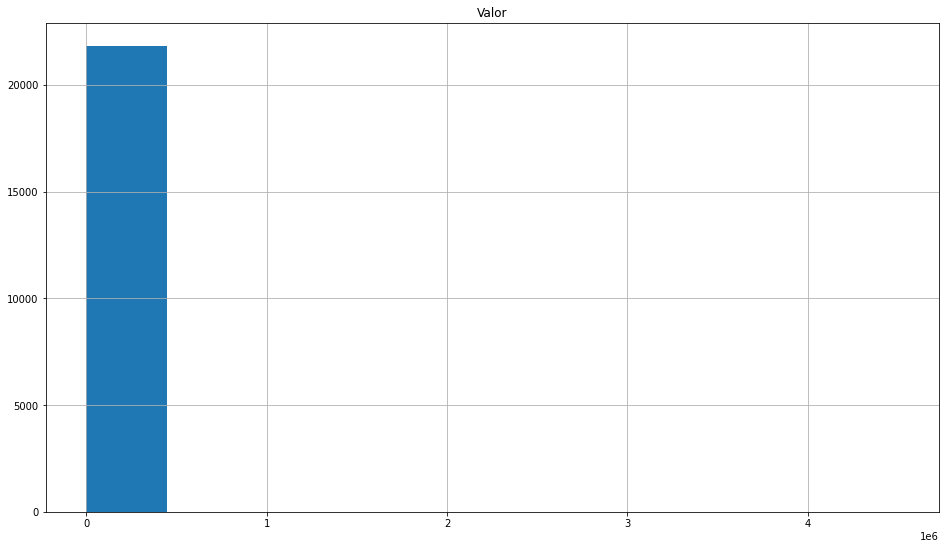

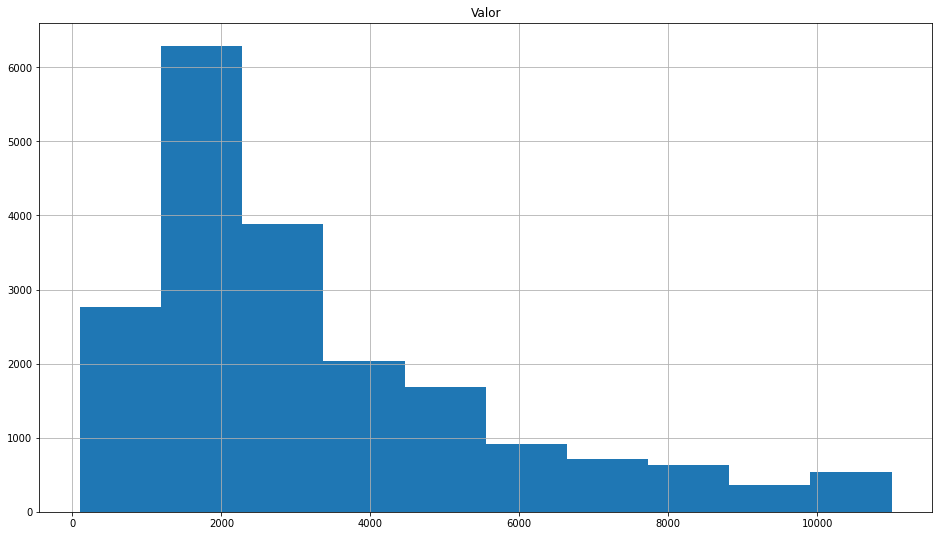

In [50]:
dados.hist(['Valor'])
dados_novos.hist(['Valor'])

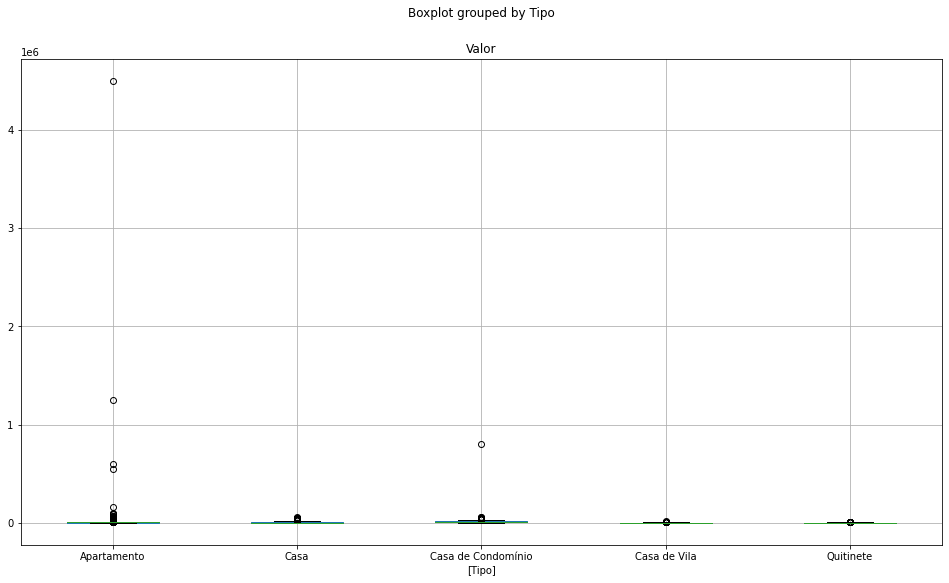

In [51]:
dados.boxplot(['Valor'], by=['Tipo'])

In [52]:
grupo_tipo  = dados.groupby('Tipo')['Valor']

In [53]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5*IIQ
limite_superior = Q3 + 1.5*IIQ

In [54]:
limite_superior['Apartamento']

9950.0

In [55]:
dados_novos = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
  e_tipo = dados['Tipo'] == tipo
  e_dentro_limite = ((dados.Valor >= limite_inferior[tipo]) & (dados.Valor <= limite_superior[tipo]))
  selecao = e_tipo & e_dentro_limite
  dados_selecao = dados[selecao]
  dados_novos = pd.concat([dados_novos, dados_selecao])


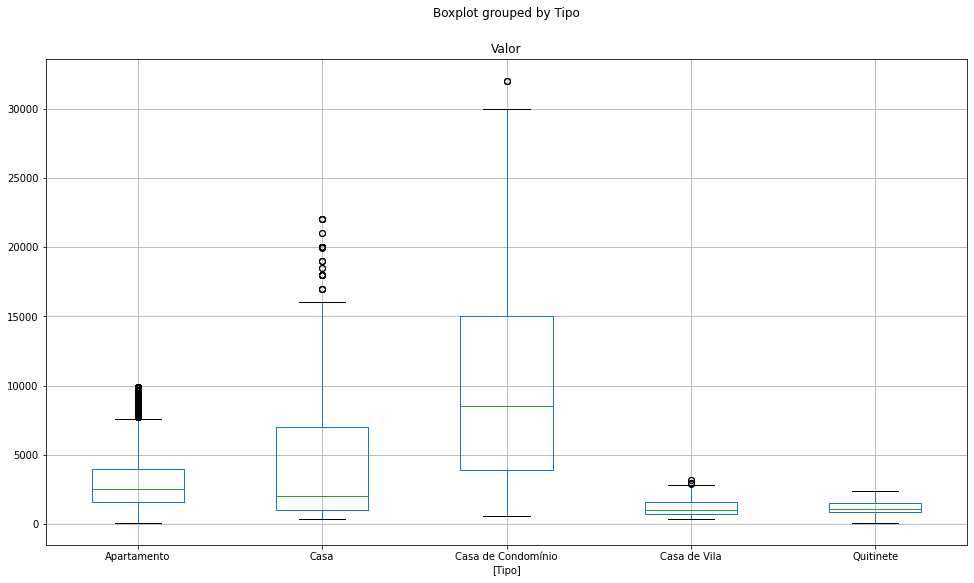

In [56]:
dados_novos.boxplot(['Valor'], by=['Tipo'])

In [57]:
dados_novos.to_csv('aluguel_residencial_sem_outliers.csv', sep=';', index=False)